In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('cleaned_customer_data.csv')

# Convert 'dt_customer' to datetime objects for feature engineering
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

# Display the first few rows to confirm it's loaded correctly
print("Dataset loaded successfully. First 5 rows:")
print(df.head())

Dataset loaded successfully. First 5 rows:
     id  year_birth      education marital_status   income  kidhome  teenhome  \
0  5524        1957       Graduate         Single  58138.0        0         0   
1  2174        1954       Graduate         Single  46344.0        1         1   
2  4141        1965       Graduate       Together  71613.0        0         0   
3  6182        1984       Graduate       Together  26646.0        1         0   
4  5324        1981  Post-Graduate        Married  58293.0        1         0   

  dt_customer  recency  mnt_wines  ...  numwebvisitsmonth  acceptedcmp3  \
0  2012-09-04       58        635  ...                  7             0   
1  2014-03-08       38         11  ...                  5             0   
2  2013-08-21       26        426  ...                  4             0   
3  2014-02-10       26         11  ...                  6             0   
4  2014-01-19       94        173  ...                  5             0   

   acceptedcmp4  ac

In [3]:
# --- Feature Engineering ---

# Calculate customer tenure in days
# We'll use the most recent date in the data as the 'today' reference point
latest_date = df['dt_customer'].max()
df['customer_tenure'] = (latest_date - df['dt_customer']).dt.days

# --- Data Preparation ---

# Convert categorical variables into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['education', 'marital_status'], drop_first=True)

# Define our target variable (y) and features (X)
y = df_encoded['response']

# Drop the original non-numerical columns and the target variable to create our feature set
X = df_encoded.drop(columns=['id', 'dt_customer', 'response'])

print("\nData prepared for modeling. Features (X) and target (y) are defined.")
print("Shape of our features (X):", X.shape)
print("Shape of our target (y):", y.shape)


Data prepared for modeling. Features (X) and target (y) are defined.
Shape of our features (X): (2240, 34)
Shape of our target (y): (2240,)


In [4]:
# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split successfully.")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Data split successfully.
Training set size: 1792
Testing set size: 448


In [5]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print("Model trained and predictions made successfully.")

Model trained and predictions made successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 85.94%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       381
           1       0.59      0.19      0.29        67

    accuracy                           0.86       448
   macro avg       0.73      0.59      0.61       448
weighted avg       0.83      0.86      0.83       448


Confusion Matrix:


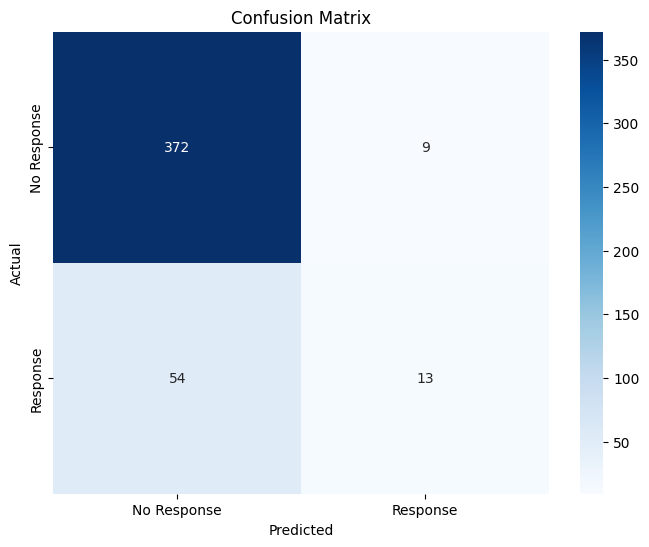

In [6]:
# --- Model Evaluation ---

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Response', 'Response'], yticklabels=['No Response', 'Response'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()